# Reading from a Damaged STL File

In [1]:
import tetgen
from sigmaepsilon.mesh import PolyData
from sigmaepsilon.mesh.downloads import download_bike_stem

# Define the path to the STL file
stl_file_path = download_bike_stem()

mesh = PolyData.from_stl(stl_file_path, clean=True, repair=True, verbose=True)

coords = mesh.coords()
topology = mesh.topology().to_numpy()

# Convert the cleaned and repaired mesh to a format suitable for TetGen
tet = tetgen.TetGen(coords, topology)

try:
    # Attempt to tetrahedralize the repaired mesh
    tetra_mesh = tet.tetrahedralize(
        order=1,
        mindihedral=10,
        minratio=1.5,
        quality=False,
        steinerleft=-1,
    )
    print("Tetrahedralization successful.")
except RuntimeError as e:
    print(f"Failed to tetrahedralize: {e}")
    print("May need to further repair surface by making it manifold.")

Fixing degeneracies and intersections
Tetrahedralization successful.


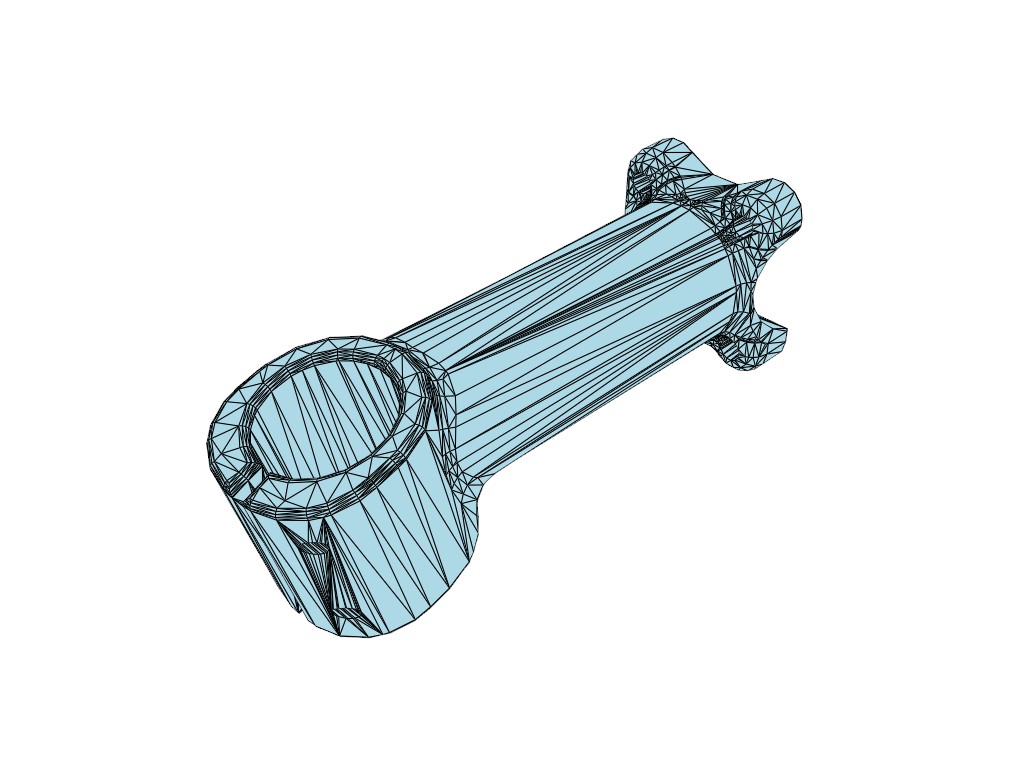

In [8]:
from sigmaepsilon.mesh import PolyData, PointData
from sigmaepsilon.mesh.space import StandardFrame
from sigmaepsilon.mesh.cells import TET4

frame = StandardFrame(dim=3)
mesh = PolyData(
    pd=PointData(coords=tetra_mesh[0], frame=frame),
    cd=TET4(topo=tetra_mesh[1], frames=frame),
)
mesh.plot(notebook=True)